In [5]:
from ultralytics import YOLO
import numpy as np #kullanacağım kütüphaneleri ekledim
model=YOLO("yolov8s.pt") #yolov8s modelini seçtim
model.train( #burada modeli eğitiyoruz
 data="dataset/data.yaml", #sınıf bilgilerini içeren dosya
 epochs=25, #burada kaç tekrar yapacağını belirttik
 batch=4, #her batch'de kaç fotoğraf alacağını belirttik
 device=-1, #cpu
 augment=True, #augmentation olacak
 lr0=0.001, #başlangıç hızını çok küçük veya çok yüksek yapmadık
 optimizer="Adam", 
 weight_decay=0.0005, #ağırlık düşürme, aşırı öğrenme yapmaması için
 patience=20 #20 epoch öğrenmede iyileşme olmazsa otomatik durdurma
 )

metrics=model.val() #değerleri aldık
dogruluk = np.array(metrics.box.p) #bounding box'ların doğruluk değerleri matematiksel işlem yapmak için
precision = metrics.box.mp
recall = metrics.box.mr
map50 = metrics.box.map50
map5095 = metrics.box.map
print("Precision:", precision)
print("Recall:", recall)
print("mAP@0.5:", map50)
print("mAP@0.5:0.95:", map5095) #değerleri yazdırdık

z_score=(dogruluk-np.mean(dogruluk))/np.std(dogruluk) #z score hesabı yaptık
for i in range(len(dogruluk)):
 print(f"Sınıf {i+1}: z-score = {z_score[i]:.4f}") #her sınıf için yazdırdık

WARNING Failed to initialize pynvml, GPU stats disabled: NVML Shared Library Not Found
Searching for 1 idle GPUs with free memory >= 20.0% and free utilization >= 0.0%...
WARNING NVML stats unavailable.
Ultralytics 8.3.235  Python-3.11.0 torch-2.9.1+cpu CPU (AMD Ryzen 7 4800H with Radeon Graphics)
engine\trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model


image 1/1 C:\Users\DeLLPC\Desktop\yolov8\dataset\test\images\24_August_Flight_1_24_August_Flight_1frame_0227_jpg.rf.e30be195d151bae261ed2ca01f3dc25e.jpg: 640x640 1 blue_hexagon, 1 blue_square, 189.9ms
Speed: 2.7ms preprocess, 189.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


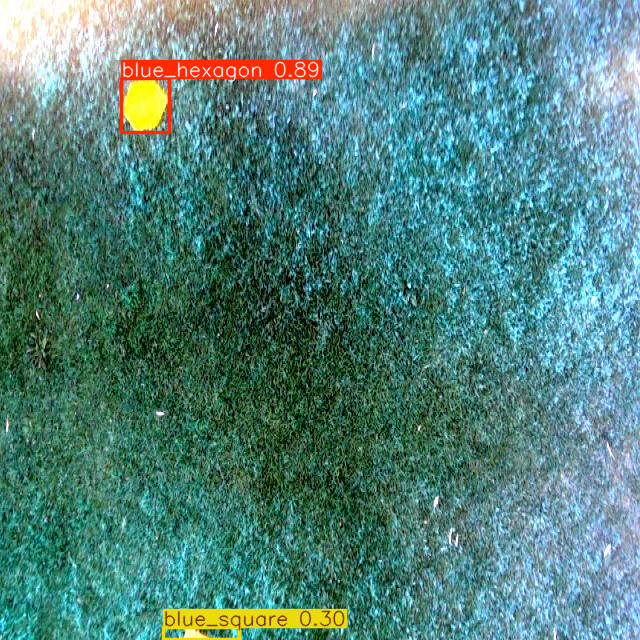


image 1/1 C:\Users\DeLLPC\Desktop\yolov8\dataset\test\images\frame_2025-08-31_19-37-27_0370_jpg.rf.47d503fae299f466bb804d47d728dea6.jpg: 640x640 1 red_triangle, 221.6ms
Speed: 3.5ms preprocess, 221.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


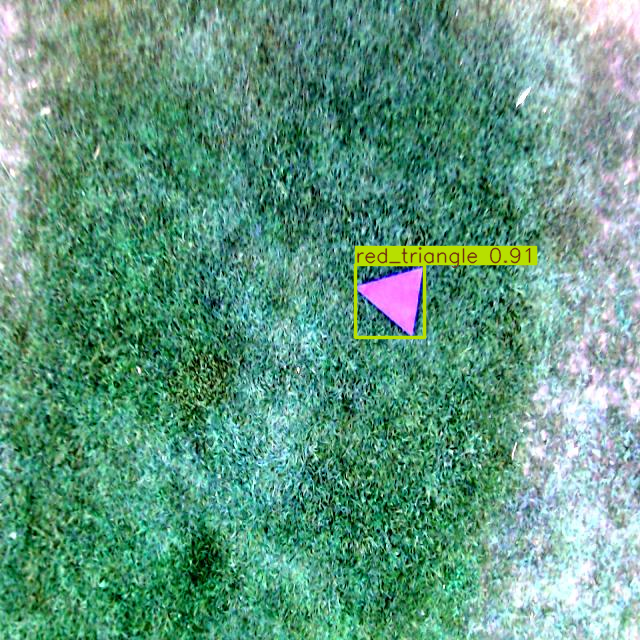


image 1/1 C:\Users\DeLLPC\Desktop\yolov8\dataset\test\images\28_Temmuz_Ucus_2_3_frame_0996_jpg.rf.c12a6ac4d1439f80b1cda61c0a14b1f5.jpg: 640x640 1 blue_hexagon, 1 red_square, 189.6ms
Speed: 2.6ms preprocess, 189.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


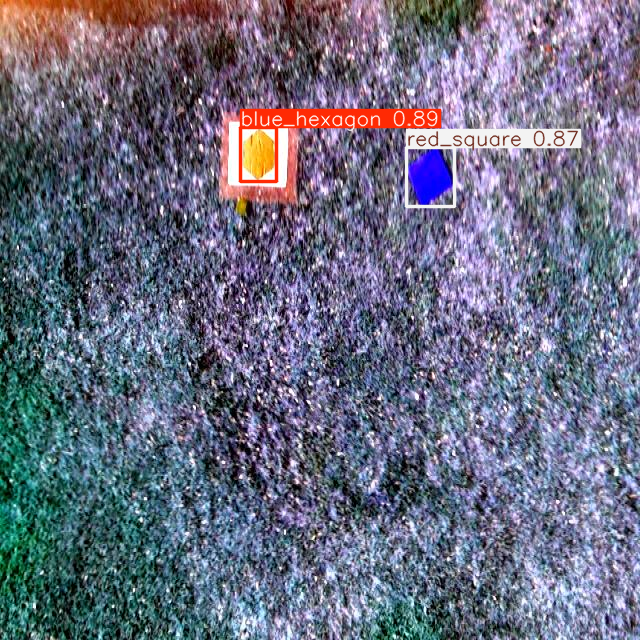

In [14]:
import os
import random
from IPython.display import display
from PIL import Image

test = "C:/Users/DeLLPC/Desktop/yolov8/dataset/test/images"
liste = os.listdir(test)
sample = random.sample(liste, 3)

for i in sample:
    path = os.path.join(test,i)   
    results = model(path)                 
    img = results[0].plot()      
    display(Image.fromarray(img)) #burada yapay zekadan yardım alarak rastgele örneklerimi gösterdim


Precision: 0.913
Recall: 0.976
mAP0.5: 0.979
mAP0.5:0.95: 0.840
 modelimiz ortalama olarak bulduğu 10 cisimden 9'unda başarılı sonuç sağlıyor.olmayan bir nesneyi var sayma olaslığı düşük
 recall ise var olanları bulma olasılığıdır. yüzde 97 oranında başarı sağlamış
 çizilen kare yüzde 50 doğru mu çizilmiş. yüzde 97 oranında evet. modelimiz bu konuda başarılı
 çizdiği kutuların 0.5 0.95 doğruluk arasındaki seviyelerde doğruluğu. burada da 0.84 yeterli seviyede olduğunu söyleyebiliriz.Zorluk seviyesi arttığından değerimiz biraz düştü.

Sınıf 1: z-score = -0.6807
Sınıf 2: z-score = -0.3143
Sınıf 3: z-score = -0.7155
Sınıf 4: z-score = 1.7105
+2 üstü modelin sıkıntılı olduğunu gösterir. burada da 4.sınıfın biraz daha problemli olduğu, modelin bu sınıfta zorlandığı söylenebilir.Diğer sınıflardaki değerleri doğru kabul edebiliriz.

 

![Confusion Matrix Normalized](C:/Users/DeLLPC/Desktop/yolov8/runs/detect/val2/confusion_matrix_normalized.png)

In [ ]:
doğru sınıflandırmalarımız gerçekten güzel ama model emin olmadığında background demiş, bu oranlar biraz fazla